In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np

from tempfile import TemporaryFile
import os
import pickle
import random 
import operator

import math

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def distance(instance1, instance2, k):
    distance = 0
    mm1 = instance1[0]
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance -= k
    return distance

In [3]:
# Find neighbors and vector distance

def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range(len(trainingSet)):
        dist = distance(trainingSet[x], instance, k) + distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    # print(neighbors)
    return neighbors

In [4]:
# Find nearest neighbour

def nearestClass(neighbors):
    classVote = {}

    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response] += 1 
        else:
            classVote[response] = 1

    sorter = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [5]:
# Model evaluation

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return 1.0*correct/len(testSet)

In [6]:
# Extracting features from wav files

directory = "C:/Users/Dzilaj Bilaj/Desktop/genres/"
# f = open("music_info.dat", 'wb')
# i = 0

FOLDERS = next(os.walk(directory), (None, [], None))[1]
# # print(FOLDERS)

# for i in range(10):
#     folder = FOLDERS[i]
#     # print(folder)
#     i+=1
#     for file in os.listdir(directory + folder):	
#         rate, data = wav.read(directory + folder + "/" + file)
#         mfcc_feat = mfcc(data, rate, winlen=0.020, appendEnergy=False)
#         covariance = np.cov(np.matrix.transpose(mfcc_feat))
#         mean_matrix = mfcc_feat.mean(0)
#         feature = (mean_matrix, covariance, i)
#         pickle.dump(feature, f)

# f.close()

In [7]:
# Training and splitting sets

# dataset = []
# def loadDataset(filename, split, trSet, teSet):
#     with open("music_info.dat", 'rb') as f:
#         while True:
#             try:
#                 dataset.append(pickle.load(f))
#             except EOFError:
#                 f.close()
#                 break	

#     for x in range(len(dataset)):
#         if random.random() < split:			
#             trSet.append(dataset[x])
#         else:
#             teSet.append(dataset[x])	

# trainingSet = []
# testSet = []
# loadDataset("music_info.dat", 0.66, trainingSet, testSet)
# print(testSet[1][-1])

In [8]:
# Predicting with KNN

# leng = len(testSet)
# predictions = []
# for x in range (leng):
#     predictions.append(nearestClass(getNeighbors(trainingSet, testSet[x], 5))) 

# accuracy1 = getAccuracy(testSet, predictions)
# print(accuracy1)

In [9]:
## Testing

In [10]:
dataset2 = []
def loadDataset2(filename):
    with open("music_info.dat" , 'rb') as f:
        while True:
            try:
               dataset2.append(pickle.load(f))
            except EOFError:
                f.close()
                break

loadDataset2("music_info.dat")

In [171]:
rate, data = wav.read(f"C:/Users/Dzilaj Bilaj/Desktop/silvera-mono-22.wav")
# print("Rate: ", rate, "Data:", data[-100:-1])

mfcc_feat = mfcc(data, rate, winlen=0.020, appendEnergy=False)
covariance = np.cov(np.matrix.transpose(mfcc_feat))
mean_matrix = mfcc_feat.mean(0)
feature = (mean_matrix, covariance, 0)
# print(feature)

pred = nearestClass(getNeighbors(dataset2, feature, 5))-1

print(FOLDERS[pred])

<ipython-input-171-d4dfd7e07f5b>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read(f"C:/Users/Dzilaj Bilaj/Desktop/silvera-mono-22.wav")
pop


In [165]:
print(mfcc_feat.shape)

(2999, 13)


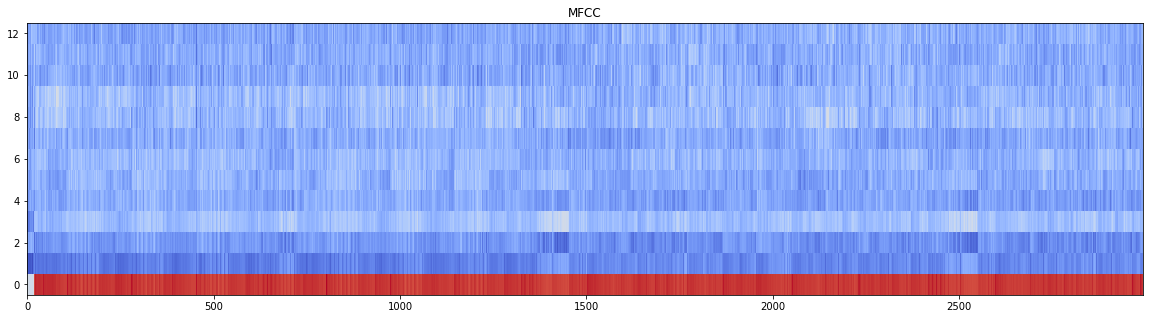

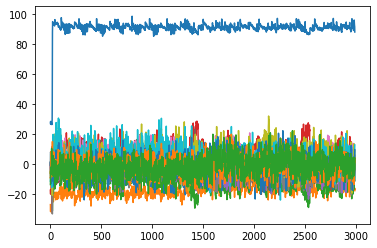

In [172]:
iq, ax = plt.subplots(figsize=(20, 5))
mfcc_data = np.swapaxes(mfcc_feat, 0, 1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')

plt.show()

plt.plot(mfcc_feat)
plt.show()

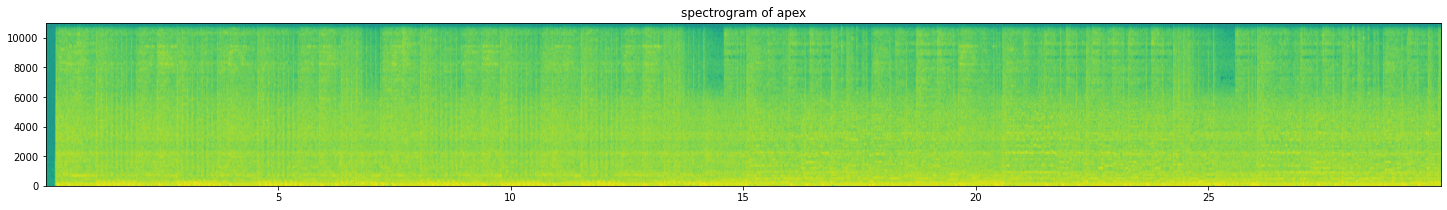

In [173]:
plt.figure(num=None, figsize=(25, 3))
plt.subplot(111)
plt.title('spectrogram of apex')
plt.specgram(data, Fs=rate)
plt.show()

C:\Users\Dzilaj Bilaj\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


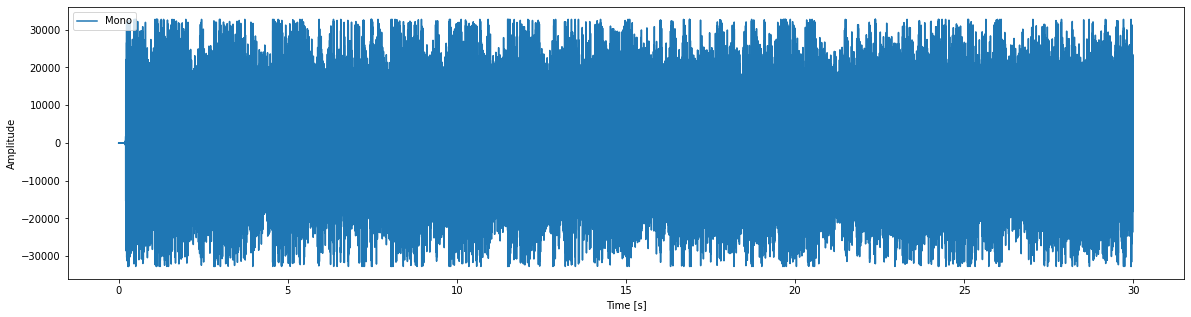

In [169]:
length = data.shape[0] / rate
time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(20, 5))
if len(data.shape) < 2:
    plt.plot(time, data, label="Mono")
else:
    plt.plot(time, data[:, 0], label="Left channel")
    plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [158]:
print(data.shape)

(661500, 2)


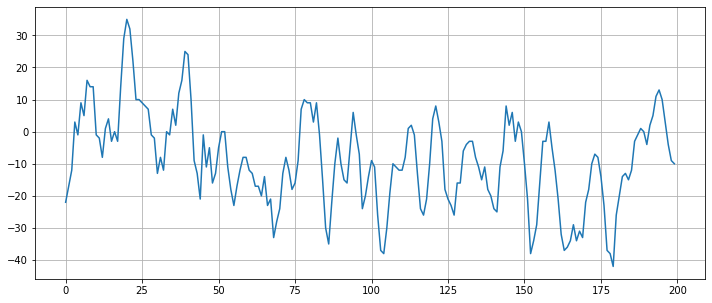

In [170]:
plt.figure(figsize=(12, 5))
plt.plot(data[800:1000]) # Zoom-in for seeing the example.
plt.grid()

In [17]:
print(FOLDERS)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
